# Линейная регрессия
__Суммарное количество баллов: 10__

In [1]:
from sklearn.datasets import make_blobs, make_moons
from sklearn.model_selection import train_test_split
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib
import copy

In [2]:
def read_data(path="boston.csv"):
    dataframe = np.genfromtxt(path, delimiter=",", skip_header=15)
    np.random.seed(42)
    np.random.shuffle(dataframe)
    X = dataframe[:, :-1]
    y = dataframe[:, -1]
    return X, y

In [3]:
def generate_synthetic(size:int, dim=6, noise=0.1):
    X = np.random.randn(size, dim)
    w = np.random.randn(dim + 1)
    noise = noise * np.random.randn(size)
    y = X.dot(w[1:]) + w[0] + noise
    return X, y

### Задание 1 (1 балл)
Для начала нужно понять, какую метрику для ошибки будем использовать. В нашем случае нам подойдет стандартная метрика MSE. Также чтобы оценить качество модели нам понадобится метрика $R^2$. Реализуйте обе эти метрики.

In [4]:
from task import mse, r2

In [290]:
def mse(y_true:np.ndarray, y_predicted:np.ndarray):
    return np.sum((y_true - y_predicted) ** 2) / len(y_true)

In [291]:
def r2(y_true:np.ndarray, y_predicted:np.ndarray):
    return 1 - np.sum((y_predicted - y_true) ** 2) / np.sum((y_true - np.mean(y_true)) ** 2)

### Задание 2 (3 балла)
Теперь реализуем линейную регрессию при помощи явного решения задачи минимизации. 

#### Методы
`fit(X, y)` - решает задачу минимизации $\arg\min_{w, b}\sum ((w\cdot x + b) - y)^2$. 

`predict(X)` - строит предсказание `y` для объектов из `X`.

In [6]:
from task import NormalLR

In [293]:
class NormalLR:
    def __init__(self):
        self.weights = None # Save weights here
    
    def fit(self, X:np.ndarray, y:np.ndarray):
        X = np.hstack((np.ones(X.shape[0])[:, np.newaxis], X))
        self.weights = np.linalg.inv(X.T @ X).T @ (X.T @ y)
    
    def predict(self, X:np.ndarray) -> np.ndarray:
        return X @ self.weights[1:] + self.weights[0]

In [7]:
X, y = generate_synthetic(1024)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [295]:
regr = NormalLR()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
print(f"MSE: {mse(y_test, y_pred)}, R2: {r2(y_test, y_pred)}")

MSE: 0.012627059921074102, R2: 0.9978337234781615


### Задание 3 (4 балла)
Теперь реализуем линейную регрессию с использованием градиентного спуска с larning rate `alpha` в течении `iterations` итераций. В задании необходимо использовать регуляризацию Лассо с коэффициентом `l`.

#### Методы
`fit(X, y)` - приближает решение задачи минимизации $\arg\min_{w, b}\sum ((w\cdot x + b) - y)^2$ при помощи градиентного спуска. 


`predict(X)` - строит предсказание `y` для объектов из `X`.

In [5]:
from task import GradientLR

In [82]:
class GradientLR:
    def __init__(self, alpha: float, iterations=10000, l=0.):
        self.alpha = alpha
        self.l = l
        self.iterations = iterations
        self.weights = None

    def fit(self, X: np.ndarray, y: np.ndarray):
        X = np.c_[X, np.ones(X.shape[0])]
        n, f = X.shape
        self.weights = np.zeros(f)
        loss = float('inf')
        for i in range(self.iterations):
            y_pred = X.dot(self.weights)
            new_loss = (2 / n) * np.sum((y_pred - y) ** 2) + self.l * np.sum(np.abs(self.weights))
            if np.abs(loss - new_loss) < 1e-6:
                break
            loss = new_loss
            dw = (2 / n) * X.T.dot(y_pred - y) + self.l * np.sign(self.weights)
            self.weights -= self.alpha * dw

    def predict(self, X: np.ndarray):
        X = np.c_[X, np.ones(X.shape[0])]
        return X.dot(self.weights)

In [73]:
np.random.normal(0,0.01,6)

array([-0.00160243,  0.03339151, -0.00550746, -0.00086141,  0.00462765,
       -0.01775337])

In [74]:
np.random.rand(7)

array([0.87547418, 0.15602122, 0.31248786, 0.98349937, 0.45096063,
       0.57548553, 0.98858529])

In [12]:
np.random.rand(20)

array([0.03388222, 0.26019008, 0.04733887, 0.58480453, 0.30528809,
       0.86370378, 0.51596663, 0.29668317, 0.69315164, 0.85285038,
       0.0175475 , 0.16686028, 0.89718827, 0.49817715, 0.71156478,
       0.11006556, 0.76094726, 0.40553984, 0.60794035, 0.70590432])

In [290]:
def build_plot(X_train, y_train, X_test, y_test):
    xs = np.arange(0.0, 0.02, 0.0002)
    errors = []
    for x in xs:
        regr = GradientLR(0.1, iterations=10000, l=x)
        regr.fit(X_train, y_train)
        errors.append(mse(y_test, regr.predict(X_test)))
    plt.figure(figsize=(9, 4))
    plt.xlim(xs[0], xs[-1])
    plt.grid()
    plt.plot(xs, errors)
    plt.show()

In [80]:
X, y = generate_synthetic(100024, dim=20)
X, X_val, y, y_val = train_test_split(X, y, train_size=0.9, shuffle=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True)

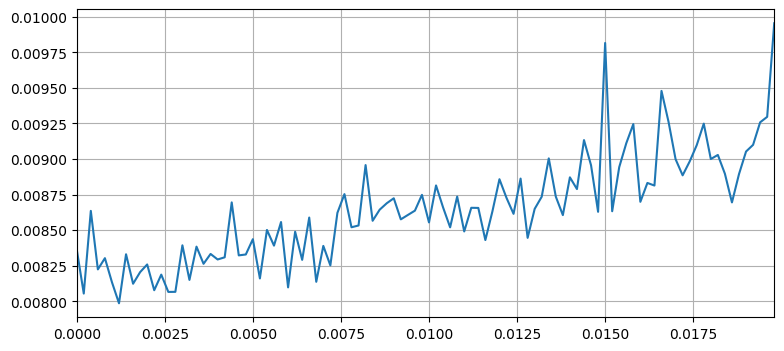

In [292]:
build_plot(X_train, y_train, X_val, y_val)

In [83]:
regr = GradientLR(0.001, iterations=10000, l=0.05)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
print(f"MSE: {mse(y_test, y_pred)}, R2: {r2(y_test, y_pred)}")

MSE: 0.024163006154083864, R2: 0.9988927924236607


In [84]:
list(regr.weights)

[0.8423494202622968,
 0.9533840863955935,
 -0.5143393874948042,
 0.8911720973738398,
 1.1631411790571067,
 -1.9225179500340541,
 -0.5507245757870518,
 0.016211122501630097,
 1.724086403297271,
 -1.1751201919332492,
 0.6617727120582477,
 -0.654221544842258,
 1.0134029387295291,
 1.6676970670562838,
 -0.6574916147910798,
 -1.0172277193323076,
 -0.22680624465099114,
 0.16534895967664054,
 -1.4010700296833813,
 0.3753578146135759,
 0.23057620631138742]

### Задание 4 (2 балла)
Линейная регрессия является методом, который можно интерпретировать основываясь на значениях весов модели. Реализуйте метод, который будет упорядочивать признаки по их важности от наибольшей важности к наименьшей.

Обратите внимание, что такая интерпретация имеет смысл только если данные предварительно нормализованы, а также в признаках нет мультиколлинеарности (если используете обычную линейную регрессию).

#### Методы
`get_feature_importance` - метод, который вычисляет важность для каждого признака. Принимает на вход обученную линейную регрессию, возвращает список значений метрики важности признаков.

`get_most_important_features`- метод, который упорядочевает признаки по их важности в порядке убывания. Принимает на вход обученную линейную регрессию, возвращает упорядоченный список, состоящий из индексов признаков.

In [8]:
from task import get_feature_importance, get_most_important_features

In [9]:
regr = NormalLR()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

print(get_feature_importance(regr))
print(get_most_important_features(regr))

[0.52252254 1.59558427 1.44546652 0.13764765 0.70252399 1.0105292 ]
[1 2 5 4 0 3]


In [ ]:
regr = GradientLR(0.1, iterations=10000)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

print(get_feature_importance(regr))
print(get_most_important_features(regr))

### Дополнительно
Протесируйте оба метода на данных `boston.csv`, для градиентного спуска постройте график зависимости ошибки от коэффициента регуляризации. 

In [47]:
X, y = read_data()
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, shuffle=False)

In [83]:
regr = NormalLR()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_val)
print(f"MSE: {mse(y_val, y_pred)}, R2: {r2(y_val, y_pred)}")

MSE: 22266311.08083764, R2: 0.6872797475660947


In [84]:
regr.weights

array([ 3.79248217e+04, -1.03749709e+02,  5.22671970e+01, -1.98246066e+01,
        2.32327766e+03, -1.72526683e+04,  3.60399125e+03,  1.05408661e+01,
       -1.53552742e+03,  3.27669175e+02, -1.44764014e+01, -9.12421623e+02,
        8.67340372e+00, -5.48157827e+02])

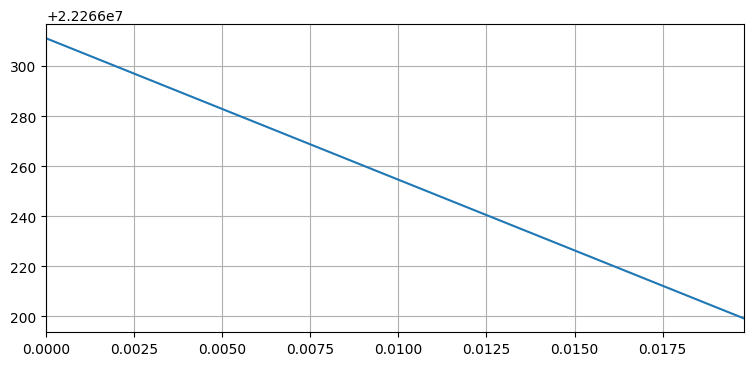

In [85]:
build_plot(X_train, y_train, X_val, y_val)

In [43]:
import numpy as np

def l1_regularization_gradient_descent(X: np.array, X_val, y: np.array, alpha: float = 0.0001, learning_rate: float = 0.001, max_iter: int = 10000, tol: float = 1e-2) -> tuple:
    n_samples, n_features = X.shape
    # Zero out weights and bias
    weights = np.random.randn(n_features) * 0.01
    bias = 0
    
    for iteration in range(max_iter):
        # Predict values
        y_pred = np.dot(X, weights) + bias
        # Calculate error
        error = y_pred - y
        # Gradient for weights with L1 penalty
        grad_w = (2 / n_samples) * np.dot(X.T, error) + alpha * np.sign(weights)
        # Gradient for bias (no penalty for bias)
        grad_b = (2 / n_samples) * np.sum(error)
        
        # Update weights and bias
        weights -= learning_rate * grad_w
        bias -= learning_rate * grad_b
        # Check for convergence
        if np.linalg.norm(grad_w, ord=1) < tol:
            break
    
    return X_val @ weights + bias

In [135]:
regr = GradientLR(0.001, iterations=1000000, l=0.0001)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_val)
print(f"MSE: {mse(y_val, y_pred)}, R2: {r2(y_val, y_pred)}")

MSE: 0.011307093507627123, R2: 0.9999090340340508


In [136]:
y_pred = l1_regularization_gradient_descent(X_train, X_val, y_train, learning_rate=0.001, alpha=0.0001,)
print(f"MSE: {mse(y_val, y_pred)}, R2: {r2(y_val, y_pred)}")

MSE: 0.011265415074437507, R2: 0.9999093693385154


Проинтерпритируйте полученные результаты. Опишите влияние каждого признака на результат предсказания.

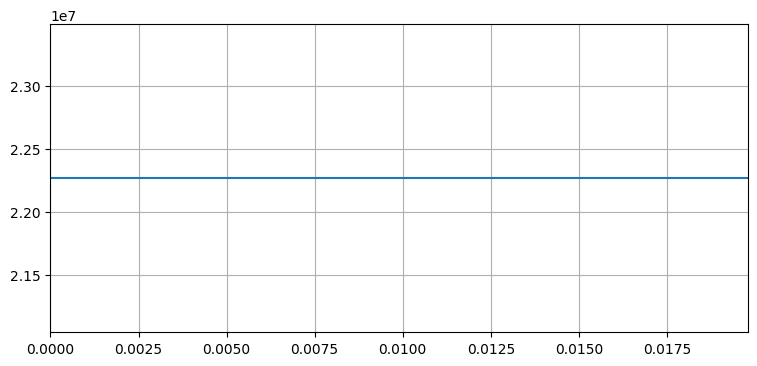

In [87]:
xs = np.arange(0.0, 0.02, 0.0002)
errors = []
for x in xs:
    regr = NormalLR()
    regr.fit(X_train, y_train)
    errors.append(mse(y_val, regr.predict(X_val)))
plt.figure(figsize=(9, 4))
plt.xlim(xs[0], xs[-1])
plt.grid()
plt.plot(xs, errors)
plt.show()

In [13]:
np.sqrt(22266257.786627952)

4718.713573276932

In [14]:
np.max(X, axis=0)

array([ 88.9762, 100.    ,  27.74  ,   1.    ,   0.871 ,   8.78  ,
       100.    ,  12.1265,  24.    , 711.    ,  22.    , 396.9   ,
        37.97  ])